In [182]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px


In [204]:
# Define the o numero de tabelas que serão geradas além da primeira
num_tables = 9
df_list=[]

# Generate valores aleatorias para y entre  5 e 8
y = 5
y_list=[y]
while y < 8:
    y+=np.random.uniform(0, 0.5)
    y_list.append(y)

# Cria um array com valores que vão de 0 até o tamanho da lista y_list
x = np.arange(0, len(y_list), 1)

#Cria um dataframe com os valores de x, e colunas y_list table_name 
df_list = pd.DataFrame({'x': x, 'y_noise': y_list,'table_name':f'Table{1}'})

# Reshape x e y values para uma regressão linear
X = df_list['x'].values.reshape(-1, 1)
y = df_list['y_noise'].values.reshape(-1, 1)

#Cria um modelo de regressão linear
model = LinearRegression()

 # Ajustar o modelo aos dados
model.fit(X, y)

# Obtenha a inclinação da linha de regressão
slope = model.coef_[0][0]

 # Adicione a inclinação à lista
slope_list=[slope]

# Prever valores de y usando o modelo
y_pred = model.predict(X)

# Adiciona valores y previstos ao dataframe
df_list['y_pred'] = y_pred.flatten()

#Percorre cada tabela
for i in range(num_tables):
    #refaz o mesmo processo para criação da df_list
    y = 5
    y_list=[y]
    while y < 8:
        y+=np.random.uniform(0, 1)**5
        y_list.append(y)

    #Usa o ultimo valor da df_list para dar continuidade ao valor de x
    last_number=df_list['x'].iloc[-1]
    x = np.arange(last_number, last_number+len(y_list), 1)
    
    df = pd.DataFrame({'x': x, 'y_noise': y_list,'table_name':f'Table{i+2}'})

    X = df['x'].values.reshape(-1, 1)
    y = df['y_noise'].values.reshape(-1, 1)

    model = LinearRegression()

    model.fit(X, y)

    slope = model.coef_[0][0]
    slope_list.append(slope)

    y_pred = model.predict(X)

    df['y_pred'] = y_pred.flatten()

    # Concatena o dataframe com o anterior
    df_list= pd.concat([df_list,df],axis=0)

# Crie um gráfico de linhas usando plotly
fig = px.line(df_list, x='x', y=['y_noise','y_pred'],color='table_name', markers=True)
fig.update_layout(title='Line Chart Example',
                  xaxis_title='X-axis Title',
                  yaxis_title='Y-axis Title',
                  plot_bgcolor='white')
fig.show()

,table_name,tamanho,media,desvio,inclinação
0,Table1,16,6.510184,1.061134,0.220006
1,Table2,18,6.862109,0.983606,0.176210
2,Table3,28,6.195834,0.775788,0.087623
3,Table4,17,6.335748,1.220586,0.234779
4,Table5,20,6.452829,1.178805,0.186349
5,Table6,22,6.580106,0.888390,0.132498
6,Table7,24,6.329691,1.027627,0.140211
7,Table8,19,6.625677,1.123910,0.195379
8,Table9,28,6.681726,0.825527,0.098920
9,Table10,13,6.662758,0.853786,0.209872


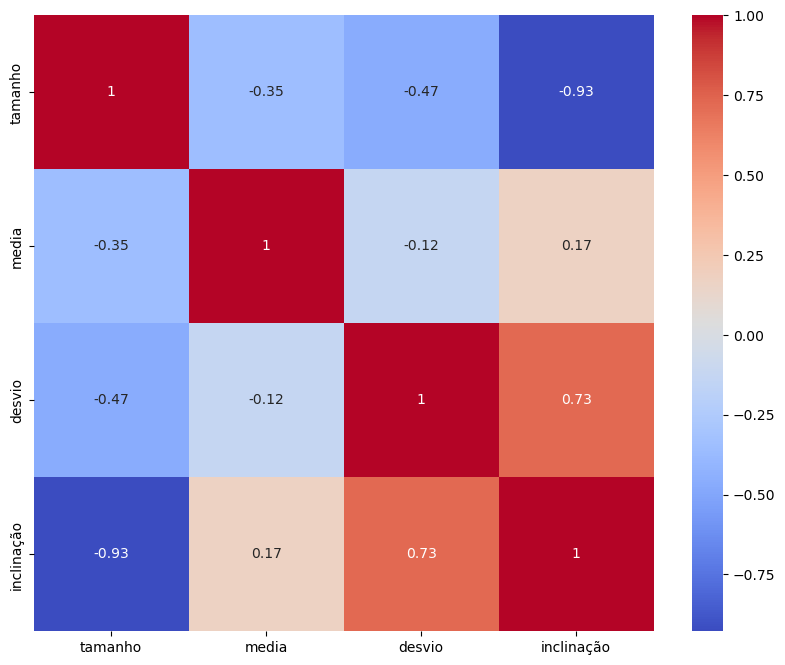

In [203]:
# Obtem os nomes exclusivos do dataframe
unique_values = df_list['table_name'].unique()

# Inicialize listas para armazenar resultados de análise
tamanho_list=[]
media_list=[]
desvio_list=[]
derivada_list=[]

#Percorre cada tabela
for table in unique_values:
    # Filtra o dataframe da tabela atual
    df_u=df_list[df_list['table_name']==table]

    #calcula o tamanho do dataframe e salva em uma lista
    tamanho=len(df_u)
    tamanho_list.append(tamanho)

    #calcula a média dos valores do dataframe e salva em uma lista
    media= df_u['y_noise'].mean()
    media_list.append(media)

    #calcula o desvio dos valores do dataframe e salva em uma lista
    desvio=df_u['y_noise'].std()
    desvio_list.append(desvio)

    #calcula a derivada dos valores do dataframe e salva em uma lista
    derivada=df_u['y_noise'].diff()
    derivada_list.append(derivada.mean())

# Cria um dataframe com resultados de análise
df_analise = pd.DataFrame({'table_name': unique_values,'tamanho':tamanho_list,'media':media_list,'desvio':desvio_list,'inclinação':slope_list})
display(df_analise)

#Calcula a matrix de correlação
corr_matrix = df_analise[['tamanho', 'media', 'desvio','inclinação']].corr()

#Cria um heatmap da matrix de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()